# Amazon Copurchased

This is a Python notebook created using "jupyter".

Author: Rafael J. P. dos Santos

## Condições do experimento

-

## Parameters

We use the parameter below to set the maximum number of edges to be read from the CSV containing edges (links).

In [1]:
max_edges = 20000 # Set quantity to read from file
edges_csv_file = "data/20180812_links"
nodes_csv_file = "data/20180812_nodes"

## Load the libraries

Let's load the Python libraries that we will need throughout the script

In [2]:
%load_ext autoreload
%autoreload 1
%aimport shared_functions
import pandas as pd
import numpy as np
from __future__ import division
import shared_functions
from IPython.display import display, HTML

## Read graph

### Read only first lines of datafile

Due to slowness in calculating centrality measures, we use the parameter provided in the beggining of the script to limit the number of edges we will read.

In [3]:
G = shared_functions.read_G(edges_csv_file, max_edges)

Using 20000 edges out of 229338 available (8.72% of data)


### Calculate nodes centrality measures

Now that we have our NetworkX graph, let's calculate some centrality measures for every node.

In [4]:
centrality_measures = shared_functions.centrality_measures(G)
print centrality_measures.keys()

['eigenvector_centrality', 'degree', 'betweenness_centrality']


### Load node properties

Let's load the CSV containing the nodes data (title, price) into a Pandas dataframe, and append the centrality measures calculated above.

In [5]:
df = pd.read_csv(nodes_csv_file)

####  Convert ID to random int to avoid leaking knowledge

In [6]:
df = shared_functions.add_sha256_column_from_id(df)

#### Add centrality measures

In [7]:
df = shared_functions.merge_columns(df, centrality_measures)

### Let's convert some fields to numeric

In [8]:
categorical_features = [
    'category1',
    'category2',
    'category3',
    'category4',
    'category5',
    'category6',
    'category7',
    'category8',
    'category9',
    'category10',
    'language',
    'coverType',
    'publisher',
    'rankingCategory',
    'authors'
]

numeric_features = [
    #'degree',
    #'eigenvector_centrality',
    #'betweenness_centrality',
    'ranking',
    'reviewCount',
    'pages',
    'weight',
    'height',
    'width',
    'depth',
    'rating'
]

df = shared_functions.prepare_data(df, numeric_features)

### Remove nodes without price

In [9]:
df = df.drop(df[df["price"].isnull()].index)

### Inspect columns

In [10]:
df.columns

Index([u'id', u'title', u'url', u'authors', u'coverType', u'publisher',
       u'edition', u'publicationDate', u'rankingCategory', u'category1',
       u'category2', u'category3', u'category4', u'category5', u'category6',
       u'category7', u'category8', u'category9', u'category10', u'isbn10',
       u'isbn13', u'language', u'postProcessed', u'price', u'ranking',
       u'pages', u'reviewCount', u'rating', u'width', u'height', u'depth',
       u'weight', u'sha256_id', u'eigenvector_centrality', u'degree',
       u'betweenness_centrality'],
      dtype='object')

### Features summary

Below we have a summary of the Pandas dataframe. We can see the number of nodes that we are actually analyzing, which depends on the max_edges parameter defined before.

In [11]:
pd.set_option('display.max_columns', None)
df.describe(include='all', percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
count,4102.000000,4102,4102,4102,4057,4061,0.0,401,3844,3797,3797,2852,1425,568,125,9,0.0,0.0,0.0,4063,4063,4061,4102.0,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4102.000000,4.102000e+03,4.102000e+03,4102.000000,4102.000000
unique,NaN,4020,4102,2948,9,427,NaN,334,1,1,28,174,301,165,48,5,NaN,NaN,NaN,4063,4063,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Macroeconomia,https://www.amazon.com.br/dp/8535931015/,Vários Autores (Autor),Capa comum,Companhia das Letras,NaN,5 de fevereiro de 2014,Livros,Livros,Literatura e Ficção,Filosofia,Matemática,Faculdade,Probabilidade e Estatística,Abstrata,NaN,NaN,NaN,8525431494,978-8521318378,Português,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,1,39,3305,355,NaN,5,3844,3797,591,325,138,41,14,3,NaN,NaN,NaN,1,1,3386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2860.202340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,90.115580,35716.256500,378.541697,16.646056,4.450203,15.334128,22.322795,2.217189,442.921269,2.101962e+09,3.745309e-03,8.495368,0.002038
std,2114.015301,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,190.122651,56611.803539,261.572101,37.048344,0.530242,2.482813,2.501593,1.289773,202.962448,1.228866e+09,1.488494e-02,22.295140,0.006585
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.990000,3.000000,4.000000,1.000000,1.000000,2.600000,8.600000,0.200000,9.100000,2.291770e+05,5.860282e-08,1.000000,0.000000
25%,1195.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,27.990000,5789.250000,216.000000,3.000000,4.400000,13.800000,20.800000,1.400000,299.000000,1.028654e+09,7.887278e-06,1.000000,0.000000
50%,2617.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,39.930000,18060.500000,320.000000,10.000000,4.453925,15.400000,22.800000,2.000000,444.980143,2.078429e+09,3.873898e-05,2.000000,0.000338
75%,3958.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,66.867500,37204.750000,464.000000,16.618748,4.800000,16.000000,23.400000,2.800000,544.000000,3.142654e+09,2.491863e-04,6.000000,0.001293


Below we can inspect the first rows of data, containing title, price, degree and other centrality measures.

In [12]:
df.head(10)

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
0,1,The Stanford Mathematics Problem Book: With Hi...,https://www.amazon.com.br/dp/0486469247/,"George Polya (Autor),",Capa comum,Dover Publications,NaN,19 de fevereiro de 2009,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0486469247,978-0486469249,Inglês,1,26.25,59183.0,68.0,1.000000,4.000000,14.0,21.0,0.6,181.0,3564330554,0.012592,19,0.003907
1,2,Fourier Series,https://www.amazon.com.br/dp/0486633179/,"Georgi P. Tolstov (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1976,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486633179,978-0486633176,Inglês,1,50.37,56112.0,352.0,3.000000,4.600000,14.6,21.0,1.9,363.0,1309098117,0.053493,62,0.002790
2,3,Probability Theory: A Concise Course,https://www.amazon.com.br/dp/0486635449/,"Y. A. Rozanov (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486635449,978-0486635446,Inglês,1,29.23,44345.0,160.0,16.618748,4.453925,14.4,20.8,0.8,200.0,1260550007,0.034533,59,0.005854
3,4,"Vectors, Tensors and the Basic Equations of Fl...",https://www.amazon.com.br/dp/0486661105/,"Rutherford Aris (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Mecânica,Hidráulica,NaN,NaN,NaN,NaN,0486661105,978-0486661100,Inglês,1,48.79,82275.0,320.0,2.000000,4.500000,13.7,21.5,1.6,381.0,4012708477,0.011867,18,0.002318
4,5,Ordinary Differential Equations,https://www.amazon.com.br/dp/0486649407/,"Morris Tenenbaum (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486649407,978-0486649405,Inglês,1,71.63,40840.0,848.0,4.000000,4.500000,13.8,21.8,4.0,939.0,3891707921,0.074789,88,0.010656
5,6,The Variational Principles of Mechanics,https://www.amazon.com.br/dp/0486650677/,"Cornelius Lanczos (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486650677,978-0486650678,Inglês,1,88.15,36960.0,418.0,1.000000,5.000000,13.8,21.5,2.2,581.0,2030201243,0.050002,43,0.005933
6,7,A First Look at Perturbation Theory,https://www.amazon.com.br/dp/0486675513/,James G. Simmonds (Autor),Capa comum,Dover Publications Inc.,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486675513,978-0486675510,Inglês,1,36.10,37291.0,160.0,16.618748,4.453925,13.7,21.5,0.8,159.0,744636978,0.008733,9,0.000273
7,8,Thermodynamics and the Kinetic Theory of Gases...,https://www.amazon.com.br/dp/0486414612/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,18 de outubro de 2010,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Dinâmica,Termodinâmica,NaN,NaN,NaN,NaN,0486414612,978-0486414614,Inglês,1,26.01,24406.0,160.0,2.000000,5.000000,13.8,21.6,1.0,159.0,425205287,0.004539,10,0.005597
8,9,Mechanics,https://www.amazon.com.br/dp/0486607542/,"Jacob P. Den Hartog (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1961,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486607542,978-0486607542,Inglês,1,50.96,90609.0,480.0,16.618748,4.453925,13.6,20.3,2.3,522.0,1246026773,0.019511,23,0.001686
9,10,Statistical Thermodynamics,https://www.amazon.com.br/dp/0486661016/,"Erwin Schrodinger (Autor),",Capa comum,Dover Publications,NaN,NaN,Liv

## Random forest using various features, price as target

### Preparing data

In [13]:
target, features, feature_list, test_features, test_target = shared_functions.prepare_datasets(df, numeric_features, categorical_features, 'price')

Numeric features:  ['ranking', 'reviewCount', 'pages', 'weight', 'height', 'width', 'depth', 'rating']
Categorical features:  ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'language', 'coverType', 'publisher', 'rankingCategory', 'authors']
Target column:  price
Test percentage:  0.199902486592
Train features shape:  (3282, 4110)
Train target shape:  (3282,)
Test features shape:  (820, 4110)
Test target shape:  (820,)


### Average price as baseline

It's important to have a baseline, so we can validate our predictions after running our model. One easy choice for baseline is the average price of a book.

We have an average price around R\$43, so this means that a very easy prediction would be to always guess R$43 for the price of any book.

In [14]:
average_target = np.average(target)
print "Average price: R$", average_target

Average price: R$ 88.31412858013407


### Cross val

#### Run cross val

In [15]:
estimators, splits, scores = shared_functions.run_cross_validation_regression(features, target)
rf = estimators[0]

#### Cross val score

In [16]:
shared_functions.print_score_summary(scores)

=== Relative
RF relative abs mean:  0.339586016486839
RF relative abs std:  0.03240333776541816
Baseline relative mean:  1.6347486753172429
Baseline relative std:  0.09101800546057642
=== Absolute
RF abs mean:  30.195685900548586
RF abs std:  5.682510296806096
Baseline mean:  81.86652702107487
Baseline std:  8.021242090633327


####  List of most important features

In [17]:
shared_functions.get_most_important_features(estimators, feature_list)

,feature,mean importance,std,std/mean
0,language_Inglês,23.791697,0.817694,0.034369
1,pages,19.430120,1.248492,0.064256
2,category2_Inglês e Outras Línguas,8.165050,0.778828,0.095386
3,width,6.900541,0.738534,0.107025
4,coverType_Capa comum,5.868292,1.779234,0.303195
5,publisher_McGraw-Hill Science/Engineering/Math,5.554975,2.031452,0.365700
6,height,3.869518,0.216965,0.056070
7,coverType_Capa dura,3.558645,0.709584,0.199397
8,ranking,2.546524,0.273973,0.107587
9,depth,2.431700,0.283832,0.116722


### Predicted price vs real price

Splits quantity:  10
Splits lenghts:  [329, 329, 328, 328, 328, 328, 328, 328, 328, 328]
X shape:  (3282, 4110)
y shape:  (3282,)


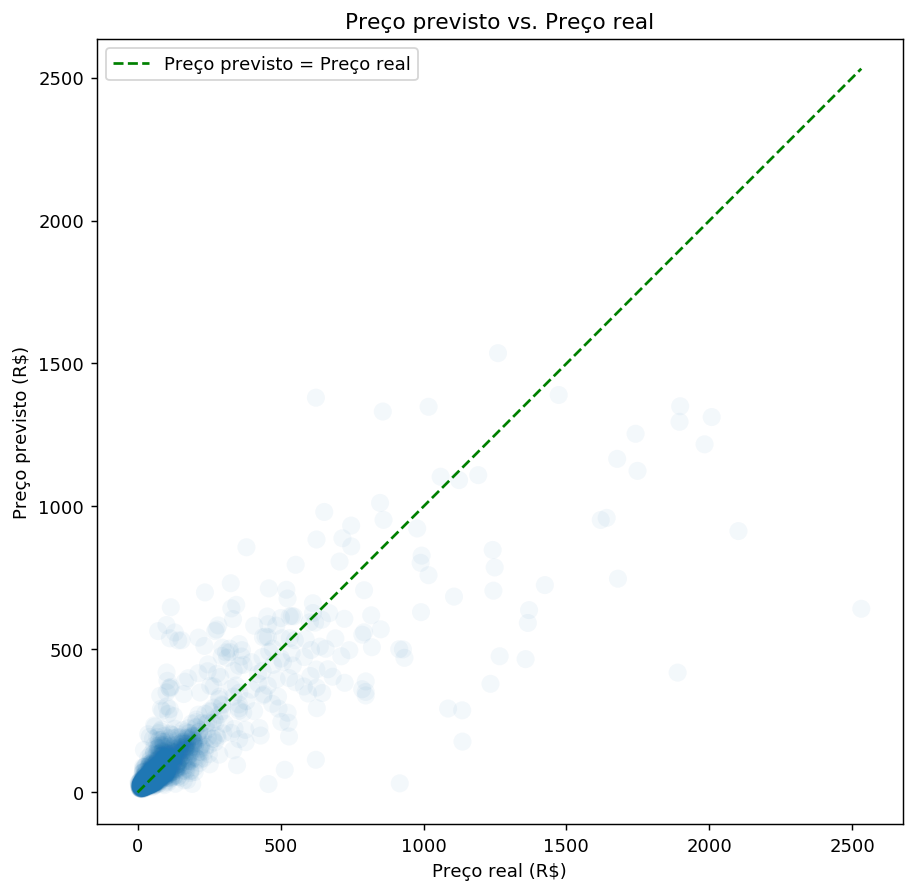

In [19]:
y_pred = shared_functions.get_all_predictions_from_splits(features, target, splits, estimators)                                                  
shared_functions.plot_splits_predicted_vs_real(target, y_pred)

### Mean absolute error

Now we can compare the errors obtained by our predictions against the errors provided by the baseline (average price). Our prediction errors should be less than the baseline errors to consider the model successful.

In [20]:
errors, errors_baseline, errors_relative, errors_baseline_relative = shared_functions.print_mean_absolute_error(y_pred, target, average_target)

== Absolute
('Mean absolute prediction error: R$', 30.2)
('Std prediction error: R$', 92.3)
('Mean absolute error using average: R$', 81.86)
('Std prediction error using average: R$', 165.45)
== Relative
('Mean relative absolute prediction error: ', 0.34)
('Std relative prediction error: ', 0.51)
('Mean relative absolute error using average: ', 1.63)
('Std relative prediction error using average: ', 1.64)


### Join data

In [21]:
pd.set_option('display.max_columns', None)
predicted_df, joined_predicted_df = shared_functions.join_predicted_df(df, features, target, y_pred, errors, errors_relative, errors_baseline, errors_baseline_relative)

### Worst absolute predictions

Below we can inspect the rows with the biggest prediction error.

In [22]:
joined_predicted_df.sort_values('error', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.565469e+08,"[456546893.0, 36626.500628, 16.6187479298, 345...",1888.87552,2442.755871,0.965108,0.746275,642.19448,2531.07,1685,Complex Analysis Complex Analysis Complex Anal...,https://www.amazon.com.br/dp/0070006571/,"Lars V. Ahlfors (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070006571,978-0070006577,Inglês,1,2531.07,36626.500628,345.000000,16.618748,4.453925,16.000000,23.100000,2.500000,444.980143,0.021073,13,0.000453
9.158984e+07,"[91589843.0, 311760.0, 16.6187479298, 545.0, 4...",1469.85094,1800.445871,0.953242,0.778209,418.90906,1888.76,1712,Vector Calculus,https://www.amazon.com.br/dp/1429215089/,"Jerrold E. Marsden (Autor),",Capa dura,W.H. Freeman & Company,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Análise Vetorial,NaN,NaN,NaN,NaN,1429215089,978-1429215084,Inglês,1,1888.76,311760.000000,545.000000,16.618748,4.453925,21.000000,26.000000,3.200000,444.980143,0.021712,13,0.001109
1.144179e+09,"[1144179495.0, 36626.500628, 16.6187479298, 43...",1187.63140,2013.225871,0.957976,0.565124,913.90860,2101.54,1991,Machine Learning,https://www.amazon.com.br/dp/0070428077/,"Tom M. Mitchell (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070428077,978-0070428072,Inglês,1,2101.54,36626.500628,432.000000,16.618748,4.453925,16.800000,24.100000,3.300000,921.000000,0.003386,4,0.000130
1.088718e+09,"[1088718135.0, 36626.500628, 16.6187479298, 22...",958.63166,1047.965871,0.922278,0.843658,177.64834,1136.28,1830,Geometric Algebra,https://www.amazon.com.br/dp/0471608394/,E. Artin (Autor),Capa comum,Wiley-Blackwell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0471608394,978-0471608394,Inglês,1,1136.28,36626.500628,224.000000,16.618748,4.453925,14.700000,22.900000,1.200000,308.000000,0.035974,32,0.001431
1.859584e+09,"[1859584463.0, 36626.500628, 16.6187479298, 69...",932.61384,1591.775871,0.947435,0.555098,747.47616,1680.09,1918,Electric Machinery and Power System Fundamentals,https://www.amazon.com.br/dp/0072291354/,Stephen J. Chapman (Autor),Capa dura,McGraw-Hill Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0072291354,978-0072291353,Inglês,1,1680.09,36626.500628,696.000000,16.618748,4.453925,19.000000,23.400000,3.300000,444.980143,0.004785,2,0.000040
1.993779e+09,"[1993779221.0, 36626.500628, 16.6187479298, 38...",890.88284,1268.685871,0.934920,0.656509,466.11716,1357.00,1716,A VULVA 2 Ed 2003,https://www.amazon.com.br/dp/8126532289/,S. M. Neill C. M. Ridley (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8126532289,978-8126532285,Inglês,1,1357.00,36626.500628,383.778694,16.618748,4.453925,15.397945,22.381195,2.237916,444.980143,0.032081,25,0.001151
2.245409e+09,"[2245408859.0, 36626.500628, 16.6187479298, 38...",885.34128,828.635871,0.903687,0.965528,31.60872,916.95,1965,Introduction to Quantum Mechanics,https://www.amazon.com.br/dp/0131118927/,David J. Griffiths (Autor),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,916.95,36626.500628,383.778694,16.618748,4.453925,15.397945,22.381195,2.237916,444.980143,0.005009,2,0.000041
1.954206e+09,"[1954206171.0, 409733.0, 1.0, 402.0, 798.0, 25...",854.54700,1145.895871,0.928445,0.692384,379.66300,1234.21,1697,Introduction to Real Analysis,https://www.amazon.com.br/dp/0471433314/,"Robert G. Bartle (Autor),",Capa dura,John Wiley & Sons,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciênc

### Worst relative predictions

In [23]:
joined_predicted_df.sort_values('error_relative', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.272729e+08,"[227272911.0, 1451.0, 9.0, 368.0, 558.0, 22.8,...",31.39502,85.324129,28.536498,10.500007,34.38502,2.99,5170,Caçadores de Obras-Primas,https://www.amazon.com.br/dp/8532526144/,Robert M. Edsel (Autor),Capa comum,Rocco,NaN,NaN,Livros,Livros,História,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8532526144,978-8532526144,Português,1,2.99,1451.000000,368.0,9.000000,4.200000,15.800000,22.800000,2.000000,558.000000,0.000015,1,0.000000
2.760304e+09,"[2760303957.0, 36626.500628, 16.6187479298, 39...",492.08700,16.284129,0.226074,6.831695,564.11700,72.03,1874,The Mathematics of Secrets – Cryptography from...,https://www.amazon.com.br/dp/0691183317/,Joshua Holden (Autor),Capa comum,Princeton University Press,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0691183317,978-0691183312,Inglês,1,72.03,36626.500628,392.0,16.618748,4.453925,15.397945,22.381195,2.237916,667.000000,0.020309,11,0.000347
1.790101e+09,"[1790101457.0, 35903.0, 15.0, 602.0, 458.0, 17...",29.42414,83.314129,16.662826,5.884828,34.42414,5.00,3579,Baudolino,https://www.amazon.com.br/dp/8577990028/,Umberto Eco (Autor),Capa comum,Best Seller,NaN,NaN,Livros,Livros,Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8577990028,978-8577990023,Português,1,5.00,35903.000000,602.0,15.000000,4.300000,11.800000,17.800000,2.200000,458.000000,0.000035,2,0.000771
4.047607e+09,"[4047607377.0, 67771.0, 1.0, 136.0, 68.0, 8.6,...",126.35318,66.244129,3.001546,5.725110,148.42318,22.07,9312,How to Win Friends & Influence People (Miniatu...,https://www.amazon.com.br/dp/0762462019/,Dale Carnegie (Autor),Capa dura,Running Press Miniature Editions,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,"Administração, Negócios e Economia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0762462019,978-0762462018,Inglês,1,22.07,67771.000000,136.0,1.000000,1.000000,7.300000,8.600000,1.600000,68.000000,0.000015,1,0.000000
2.839318e+08,"[283931800.0, 14644.0, 8.0, 192.0, 222.0, 18.4...",24.88202,83.314129,16.662826,4.976404,29.88202,5.00,4791,Um Certo Capitão Rodrigo,https://www.amazon.com.br/dp/8535905987/,Erico Verissimo (Autor),Capa comum,Companhia das Letras,NaN,NaN,Livros,Livros,Literatura e Ficção,Poesia,Europeia,NaN,NaN,NaN,NaN,NaN,NaN,8535905987,978-8535905984,Português,1,5.00,14644.000000,192.0,8.000000,4.800000,13.400000,18.400000,1.600000,222.000000,0.000021,1,0.000000
1.029516e+09,"[1029516329.0, 36626.500628, 16.6187479298, 59...",484.34844,12.675871,0.125516,4.796004,585.33844,100.99,1894,Partial Differential Equations of Mathematical...,https://www.amazon.com.br/dp/0486688895/,"Ronald B. Guenther (Autor),",Capa comum,Dover Publications Inc.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0486688895,978-0486688893,Inglês,1,100.99,36626.500628,592.0,16.618748,4.453925,16.600000,23.400000,2.700000,748.000000,0.018979,15,0.000438
1.879984e+09,"[1879983517.0, 428052.0, 16.6187479298, 400.0,...",531.39124,27.815871,0.239524,4.575831,647.52124,116.13,1853,Burn Math Class: And Reinvent Mathematics for ...,https://www.amazon.com.br/dp/0465053734/,Jason Wilkes (Autor),Capa dura,Basic Books,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0465053734,978-0465053735,Inglês,1,116.13,428052.000000,400.0,16.618748,4.453925,16.500000,24.100000,3.800000,590.000000,0.015500,13,0.002210
2.674498e+09,"[2674497925.0, 426261.0, 1.0, 149.0, 118.0, 16...",166.42102,51.304129,1.386223,4.496650,203.43102,37.01,1484,Happiness,https://www.amazon.com.br/dp/0199590605/,Daniel M. Haybron (Autor),Capa comum,"Oxfor

### Best absolute predictions

In [24]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.423622e+08,"[442362219.0, 4893.0, 136.0, 192.0, 295.0, 20....",0.00552,66.414129,3.032609,0.000252,21.90552,21.90,2314,Filosofia Para Corajosos,https://www.amazon.com.br/dp/8542207513/,Luiz Felipe Pondé (Autor),Capa comum,Planeta,NaN,NaN,Livros,Livros,Ciências,História e Filosofia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8542207513,978-8542207514,Português,1,21.90,4893.0,192.0,136.000000,4.200000,13.8,20.8,1.4,295.000000,0.000084,5,0.001075
8.260535e+08,"[826053518.0, 8270.0, 6.0, 544.0, 862.0, 24.0,...",0.00936,0.185871,0.002100,0.000106,88.50936,88.50,803,Elementos de Eletrônica Digital,https://www.amazon.com.br/dp/8571940193/,Francisco G. Capuano / Ivan V. Idoeta (Autor),Capa comum,Érica,NaN,NaN,Livros,Livros,Engenharia e Transporte,Engenharia,Elétrica e Eletrônica,Eletrônica,NaN,NaN,NaN,NaN,NaN,8571940193,978-8571940192,Português,1,88.50,8270.0,544.0,6.000000,4.800000,16.6,24.0,2.8,862.000000,0.000005,3,0.001129
3.111671e+09,"[3111671101.0, 1435.0, 17.0, 400.0, 780.0, 23....",0.02082,28.414129,0.474359,0.000348,59.92082,59.90,6347,Eletrônica Para Makers,https://www.amazon.com.br/dp/8575225251/,"Charles Platt (Autor),",Capa comum,Novatec,NaN,NaN,Livros,Livros,Engenharia e Transporte,Engenharia,Elétrica e Eletrônica,Eletrônica,NaN,NaN,NaN,NaN,NaN,8575225251,978-8575225257,Português,1,59.90,1435.0,400.0,17.000000,4.700000,16.8,23.8,2.4,780.000000,0.001179,2,0.000146
1.208603e+09,"[1208602928.0, 68781.0, 2.0, 232.0, 422.0, 22....",0.02228,58.694129,1.981571,0.000752,29.64228,29.62,3483,O Livro Secreto da Maçonaria,https://www.amazon.com.br/dp/8568535321/,Otávio Cohen (Autor),Capa comum,Abril,NaN,NaN,Livros,Livros,Religião e Espiritualidade,Estudos da Religião,Igreja e Estado,NaN,NaN,NaN,NaN,NaN,NaN,8568535321,978-8568535325,Português,1,29.62,68781.0,232.0,2.000000,4.500000,15.4,22.8,1.4,422.000000,0.000012,1,0.000000
5.207163e+08,"[520716332.0, 17011.0, 16.6187479298, 304.0, 3...",0.02368,55.414129,1.684320,0.000720,32.92368,32.90,547,Poeira Lunar,https://www.amazon.com.br/dp/8576574055/,"Arthur C. Clarke (Autor),",Capa comum,Aleph,NaN,31 de maio de 2018,Livros,Livros,Literatura e Ficção,Literatura Clássica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8576574055,978-8576574057,Português,1,32.90,17011.0,304.0,16.618748,4.453925,14.0,20.8,1.4,381.000000,0.000141,71,0.010809
3.704679e+09,"[3704679003.0, 42980.0, 3.0, 376.0, 322.0, 17....",0.02374,57.414129,1.858062,0.000768,30.87626,30.90,3081,Imperialismo Ecológico,https://www.amazon.com.br/dp/8535918590/,Alfred W. Crosby (Autor),Livro de bolso,Companhia de Bolso,NaN,NaN,Livros,Livros,Ciências,Ciências Biológicas,Ecologia,NaN,NaN,NaN,NaN,NaN,NaN,8535918590,978-8535918595,Português,1,30.90,42980.0,376.0,3.000000,4.600000,12.4,17.8,2.0,322.000000,0.000041,5,0.003245
1.602287e+08,"[160228673.0, 2666.0, 2.0, 568.0, 898.0, 23.4,...",0.02642,34.414129,0.638481,0.000490,53.92642,53.90,3121,A Batalha de Ardenas,https://www.amazon.com.br/dp/8542212312/,Antony Beevor (Autor),Capa dura,Crítica,NaN,NaN,Livros,Livros,História,Militar,II Guerra Mundial,NaN,NaN,NaN,NaN,NaN,NaN,8542212312,978-8542212310,Português,1,53.90,2666.0,568.0,2.000000,5.000000,16.4,23.4,3.4,898.000000,0.000016,3,0.000367
3.012085e+08,"[301208463.0, 3770.0, 6.0, 280.0, 444.98014321...",0.03030,33.314129,0.605711,0.000551,55.03030,55.00,3374,Minhas Plantas,https://www.amazon.com.br/dp/8584390855/,Carol Costa (Autor),Capa dura,Paralela,NaN,NaN,Livros,Livros,"Artesanato, Casa e Estilo de Vida",Jardinagem e Horticultura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8584390855,978-8584390854,Portugu

### Best relative predictions

In [25]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.423622e+08,"[442362219.0, 4893.0, 136.0, 192.0, 295.0, 20....",0.00552,66.414129,3.032609,0.000252,21.90552,21.90,2314,Filosofia Para Corajosos,https://www.amazon.com.br/dp/8542207513/,Luiz Felipe Pondé (Autor),Capa comum,Planeta,NaN,NaN,Livros,Livros,Ciências,História e Filosofia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8542207513,978-8542207514,Português,1,21.90,4893.0,192.0,136.000000,4.200000,13.8,20.8,1.4,295.000000,0.000084,5,0.001075
8.260535e+08,"[826053518.0, 8270.0, 6.0, 544.0, 862.0, 24.0,...",0.00936,0.185871,0.002100,0.000106,88.50936,88.50,803,Elementos de Eletrônica Digital,https://www.amazon.com.br/dp/8571940193/,Francisco G. Capuano / Ivan V. Idoeta (Autor),Capa comum,Érica,NaN,NaN,Livros,Livros,Engenharia e Transporte,Engenharia,Elétrica e Eletrônica,Eletrônica,NaN,NaN,NaN,NaN,NaN,8571940193,978-8571940192,Português,1,88.50,8270.0,544.0,6.000000,4.800000,16.6,24.0,2.8,862.000000,0.000005,3,0.001129
3.111671e+09,"[3111671101.0, 1435.0, 17.0, 400.0, 780.0, 23....",0.02082,28.414129,0.474359,0.000348,59.92082,59.90,6347,Eletrônica Para Makers,https://www.amazon.com.br/dp/8575225251/,"Charles Platt (Autor),",Capa comum,Novatec,NaN,NaN,Livros,Livros,Engenharia e Transporte,Engenharia,Elétrica e Eletrônica,Eletrônica,NaN,NaN,NaN,NaN,NaN,8575225251,978-8575225257,Português,1,59.90,1435.0,400.0,17.000000,4.700000,16.8,23.8,2.4,780.000000,0.001179,2,0.000146
1.208603e+09,"[1208602928.0, 68781.0, 2.0, 232.0, 422.0, 22....",0.02228,58.694129,1.981571,0.000752,29.64228,29.62,3483,O Livro Secreto da Maçonaria,https://www.amazon.com.br/dp/8568535321/,Otávio Cohen (Autor),Capa comum,Abril,NaN,NaN,Livros,Livros,Religião e Espiritualidade,Estudos da Religião,Igreja e Estado,NaN,NaN,NaN,NaN,NaN,NaN,8568535321,978-8568535325,Português,1,29.62,68781.0,232.0,2.000000,4.500000,15.4,22.8,1.4,422.000000,0.000012,1,0.000000
5.207163e+08,"[520716332.0, 17011.0, 16.6187479298, 304.0, 3...",0.02368,55.414129,1.684320,0.000720,32.92368,32.90,547,Poeira Lunar,https://www.amazon.com.br/dp/8576574055/,"Arthur C. Clarke (Autor),",Capa comum,Aleph,NaN,31 de maio de 2018,Livros,Livros,Literatura e Ficção,Literatura Clássica,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8576574055,978-8576574057,Português,1,32.90,17011.0,304.0,16.618748,4.453925,14.0,20.8,1.4,381.000000,0.000141,71,0.010809
3.704679e+09,"[3704679003.0, 42980.0, 3.0, 376.0, 322.0, 17....",0.02374,57.414129,1.858062,0.000768,30.87626,30.90,3081,Imperialismo Ecológico,https://www.amazon.com.br/dp/8535918590/,Alfred W. Crosby (Autor),Livro de bolso,Companhia de Bolso,NaN,NaN,Livros,Livros,Ciências,Ciências Biológicas,Ecologia,NaN,NaN,NaN,NaN,NaN,NaN,8535918590,978-8535918595,Português,1,30.90,42980.0,376.0,3.000000,4.600000,12.4,17.8,2.0,322.000000,0.000041,5,0.003245
1.602287e+08,"[160228673.0, 2666.0, 2.0, 568.0, 898.0, 23.4,...",0.02642,34.414129,0.638481,0.000490,53.92642,53.90,3121,A Batalha de Ardenas,https://www.amazon.com.br/dp/8542212312/,Antony Beevor (Autor),Capa dura,Crítica,NaN,NaN,Livros,Livros,História,Militar,II Guerra Mundial,NaN,NaN,NaN,NaN,NaN,NaN,8542212312,978-8542212310,Português,1,53.90,2666.0,568.0,2.000000,5.000000,16.4,23.4,3.4,898.000000,0.000016,3,0.000367
3.012085e+08,"[301208463.0, 3770.0, 6.0, 280.0, 444.98014321...",0.03030,33.314129,0.605711,0.000551,55.03030,55.00,3374,Minhas Plantas,https://www.amazon.com.br/dp/8584390855/,Carol Costa (Autor),Capa dura,Paralela,NaN,NaN,Livros,Livros,"Artesanato, Casa e Estilo de Vida",Jardinagem e Horticultura,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8584390855,978-8584390854,Portugu

### Relative errors distribution

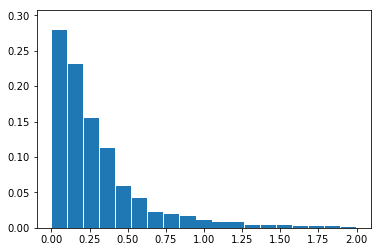

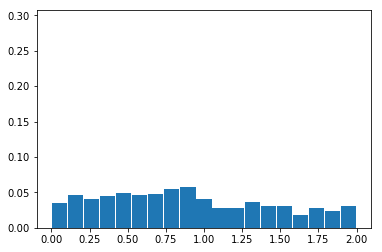

In [26]:
centers, normalized_hist_predicted, normalized_hist_baseline = shared_functions.plot_relative_error_distribution(predicted_df)

#### Accumulated

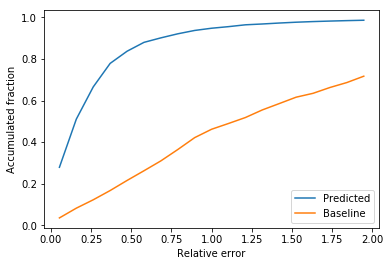

In [27]:
shared_functions.plot_accumulated_relative_error(centers, normalized_hist_predicted, normalized_hist_baseline)

### Joined data summary

In [28]:
joined_predicted_df.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,error,error_baseline,error_baseline_relative,error_relative,prediction,target,id,edition,category8,category9,category10,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
count,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,0.0,0.0,0.0,0.0,3282.0,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3282.000000,3.282000e+03,3282.000000,3282.000000
mean,30.195470,81.863381,1.634742,0.339599,83.529150,88.314129,2865.373553,NaN,NaN,NaN,NaN,1.0,88.314129,35510.943366,376.840284,16.701477,4.448449,15.326053,22.317597,2.210331,443.792287,3.850536e-03,8.525289,0.001986
std,92.313916,165.472738,1.638452,0.509634,143.620042,184.620916,2113.417055,NaN,NaN,NaN,NaN,0.0,184.620916,56733.207998,255.452118,38.217819,0.535765,2.468639,2.475993,1.277472,202.881904,1.525728e-02,21.942364,0.006515
min,0.005520,0.155871,0.001762,0.000106,10.740460,2.990000,1.000000,NaN,NaN,NaN,NaN,1.0,2.990000,3.000000,4.000000,1.000000,1.000000,2.600000,8.600000,0.200000,9.100000,5.860282e-08,1.000000,0.000000
25%,3.737740,38.524129,0.605784,0.094344,30.202330,27.907500,1195.250000,NaN,NaN,NaN,NaN,1.0,27.907500,5910.250000,216.000000,3.000000,4.400000,13.800000,20.800000,1.400000,299.000000,7.841563e-06,1.000000,0.000000
50%,8.662020,53.414129,1.208129,0.203889,39.240300,39.995000,2647.500000,NaN,NaN,NaN,NaN,1.0,39.995000,17952.500000,320.000000,9.500000,4.453925,15.400000,22.800000,2.000000,444.980143,3.811717e-05,2.000000,0.000335
75%,18.788015,65.391629,2.164531,0.391478,63.974520,64.997500,3951.750000,NaN,NaN,NaN,NaN,1.0,64.997500,36963.000000,464.000000,16.618748,4.800000,16.000000,23.400000,2.700000,558.000000,2.396936e-04,6.000000,0.001287
85%,32.402029,71.832610,2.841415,0.553634,110.165800,104.340000,4429.850000,NaN,NaN,NaN,NaN,1.0,104.340000,58608.150000,584.000000,16.618748,5.000000,16.800000,23.900000,3.200000,662.000000,6.872978e-04,12.000000,0.002270
90%,52.238234,78.324129,3.437896,0.732219,158.626046,154.891000,5635.600000,NaN,NaN,NaN,NaN,1.0,154.891000,77619.500000,672.000000,24.000000,5.000000,18.500000,24.800000,3.600000,739.000000,4.334879e-03,18.000000,0.003743
95%,113.073490,233.095371,4.523085,1.086896,343.968724,321.409500,7549.250000,NaN,NaN,NaN,NaN,1.0,321.409500,127019.650000,840.000000,53.950000,5.000000,20.800000,27.600000,4.400000,839.000000,2.726958e-02,36.000000,0.008637


### Visualize decision tree

In [29]:
shared_functions.render_image_first_decision_tree(rf, feature_list, 'tree-price.png')

Output image:  tree-price.png


<img src="files/image.png">